### 🚀**Objetivo: Contar la historia del mercado de móviles en Perú**
### 💻Bussiness Case:
La empresa consultora **UdeP Analytical Solutions**  ha sido contratada por Claro para analizar la evolución del mercado de telecomunicaciones peruano desde 2013, cuando dos fuertes competidores, Entel y Bitel, ingresaron al mercado.

La consultora ha decidido comenzar desde lo más alto, analizando la dinámica del mercado de telecomunicaciones por cuota de mercado, líneas de producto y segmentos. 

El objetivo del encargo es dar a Claro una visión tanto del mercado como de su posición particular en el mismo. Claro califica al consultor por la veracidad de la respuesta, por la capacidad de comunicación y el formato de la presentación. 

In [68]:
#loading all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import functools
from decimal import Decimal
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from scipy.interpolate import make_interp_spline

In [44]:
# loading data from all files in the folder separately
folder_path = 'C:\\Users\\USER\\Desktop\\Parcial_TEE\\parcial_TEE_project_storytelling\\data'
file_paths = glob.glob(os.path.join(folder_path, '*.csv'))

data = {}
for file_path in file_paths:
    data[os.path.basename(file_path)] = pd.read_csv(file_path, sep=',')
#opening the files
ingresos = data['ingresos_df.csv']
moviles = data['moviles_df.csv']

### **Ingresos del mercado total** 💸
1. **¿Cuánto factura anualmente el mercado de telecomunicaciones en el Perú (todos las líneas de negocio) y ¿Cuál es la tasa de crecimiento anualizada del mercado del 2013 al 2021? (realizar un gráfico de linea de la evolución de la tasa de crecimiento del mercado)** 

In [45]:
#facturación anual del mercado de telecomunicaciones en el Perú en todas las lineas de negocio
ingresos_total_anual = ingresos.groupby(['Año']).agg({'Ingresos soles':'sum'}).reset_index()
ingresos_total_anual['Tasa de crecimiento(%)'] = ingresos_total_anual['Ingresos soles'].pct_change()*100 # tasa de crecimiento anual evolución de los ingresos
ingresos_total_anual

,Año,Ingresos soles,Tasa de crecimiento(%)
0,2013,15245489131,NaN
1,2014,16633430993,9.103951
2,2015,17689307310,6.347917
3,2016,18181457364,2.782190
4,2017,18516442418,1.842454
5,2018,18824293950,1.662585
6,2019,19509399106,3.639473
7,2020,17405010796,-10.786536
8,2021,20430665240,17.383813


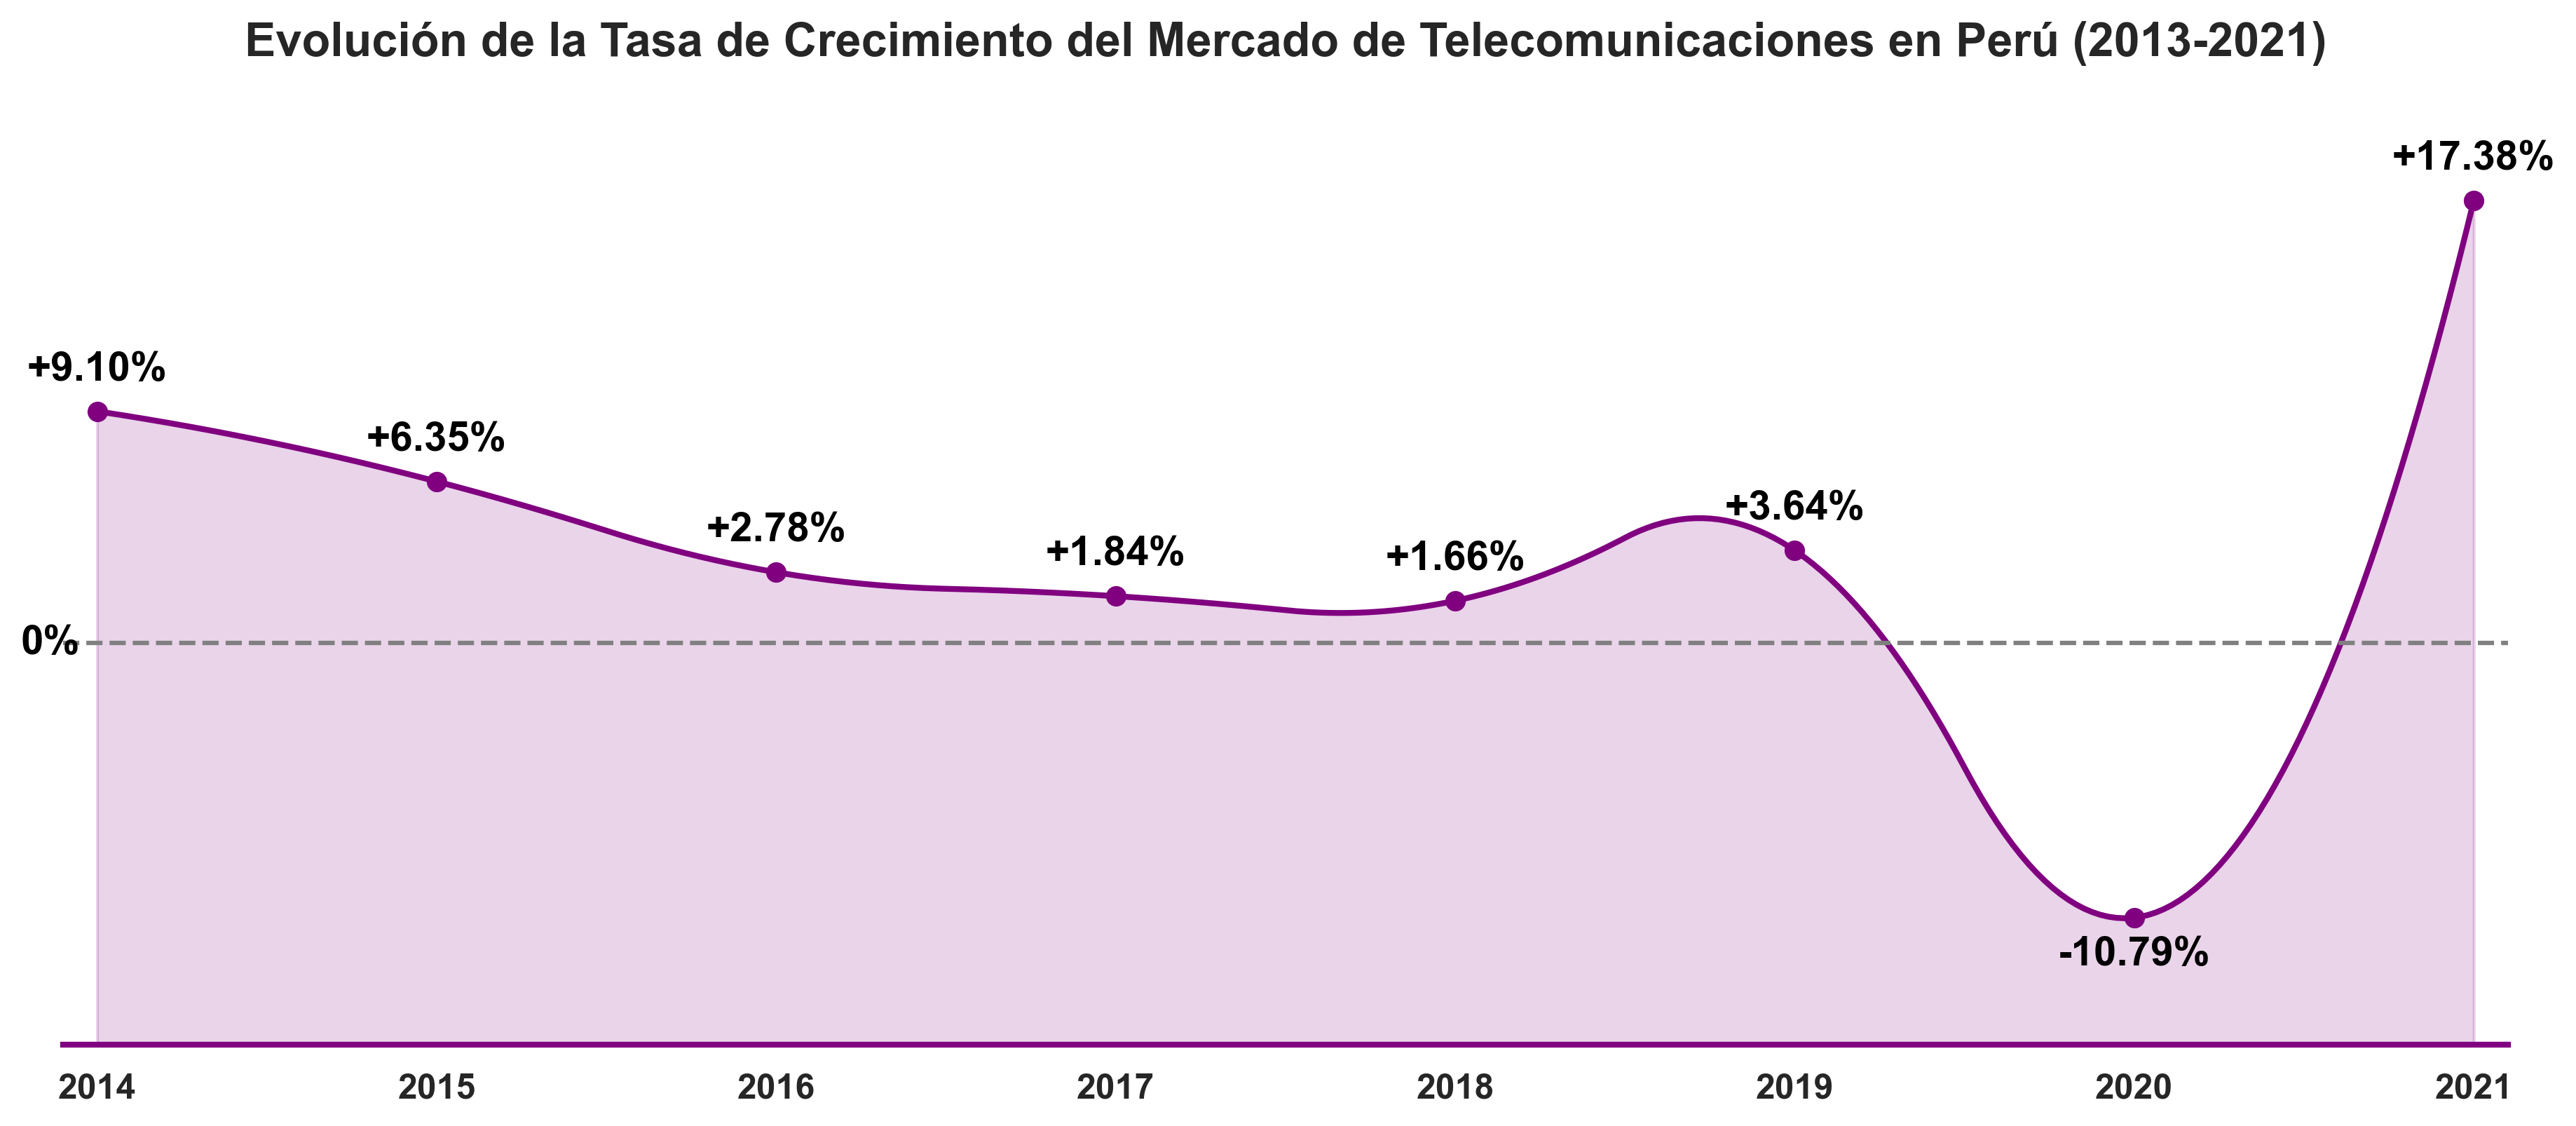

In [130]:
# Graficando la evolución
ingresos_total_anual = ingresos_total_anual.dropna()
sns.set(style='white', palette='muted')
plt.figure(figsize=(15, 6), dpi=300)
x = ingresos_total_anual['Año']
y = ingresos_total_anual['Tasa de crecimiento(%)']

# Crear una línea suavizada
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=2)  # B-spline de grado 2
y_smooth = spl(x_new)

plt.plot(x_new, y_smooth, color='purple', linewidth=2)
plt.scatter(x, y, color='purple')  # Puntos originales

# Añadir etiquetas a los puntos
for x_val, y_val in zip(x, y):
    if y_val > 0:
        plt.text(x_val, y_val + 0.9, f'+{y_val:.2f}%', ha='center', va='bottom', fontsize=14, weight='bold', color='black')
    else:
        plt.text(x_val, y_val - 0.7, f'{y_val:.2f}%', ha='center', va='top', fontsize=14, weight='bold', color='black')

# Ajustar los límites del eje y
plt.ylim(y.min() - 5, y.max() + 5)

# Ajustar los límites del eje x
plt.xlim(x.min()-0.1, x.max()+0.1)

# Crear un efecto desenfocado de color hacia abajo desde la línea del gráfico
ax = plt.gca()
ax.set_facecolor('white')
ax.patch.set_alpha(0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('purple')
    spine.set_linewidth(2)
    spine.set_visible(True)

# Rellenar el área bajo la curva con un gradiente de color uniforme
plt.fill_between(x_new, y_smooth, y.min() - 5, color='purple', alpha=0.17)

sns.despine(left=True)
plt.title('Evolución de la Tasa de Crecimiento del Mercado de Telecomunicaciones en Perú (2013-2021)', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.text(x.min()-0.05, 0, '0%', ha='right', va='center', fontsize=14, color='black', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.gca().set_yticklabels([])

# Mostrar el gráfico
plt.show()

In [ ]:
ingresos_total_compañias_anual = ingresos.groupby(['Año','Compañia']).agg({'Ingresos soles':'sum'}).reset_index()
